In [1]:
import pandas as pd

data = pd.read_csv('./fakeData/insurance_claims.csv')
c = data.columns
c

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

## Clean data

In [2]:
data.drop(['policy_number','policy_csl','policy_bind_date','policy_state','insured_zip','insured_education_level', 'insured_occupation','insured_hobbies', 'insured_relationship', 'incident_date', 
          'incident_type', 'incident_location', 'collision_type', 'authorities_contacted', 'incident_state', 'incident_city', 'auto_make', 'auto_model','_c39', 'umbrella_limit', 'auto_year','bodily_injuries' , 'insured_sex'],axis = 1, inplace =True)

In [3]:
# sexdict = {'MALE': 0,'FEMALE':1}

# data.insured_sex = [sexdict[i] for i in data.insured_sex] #binary

damagedict = {'Trivial Damage':0, 'Minor Damage':1, 'Major Damage':2, 'Total Loss':3}

data.incident_severity = [damagedict[i] for i in data.incident_severity] #linear scale

propdamagedict = {'?':0.5, 'NO':0, 'YES':1}

data.property_damage = [propdamagedict[i] for i in data.property_damage] #binary 

data.police_report_available = [propdamagedict[i] for i in data.police_report_available] 

frauddict = {'N':0,'Y':1}

data.fraud_reported = [frauddict[i] for i in data.fraud_reported] 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   capital-gains                1000 non-null   int64  
 5   capital-loss                 1000 non-null   int64  
 6   incident_severity            1000 non-null   int64  
 7   incident_hour_of_the_day     1000 non-null   int64  
 8   number_of_vehicles_involved  1000 non-null   int64  
 9   property_damage              1000 non-null   float64
 10  witnesses                    1000 non-null   int64  
 11  police_report_available      1000 non-null   float64
 12  total_claim_amount           1000 non-null   int64  
 13  injury_claim       

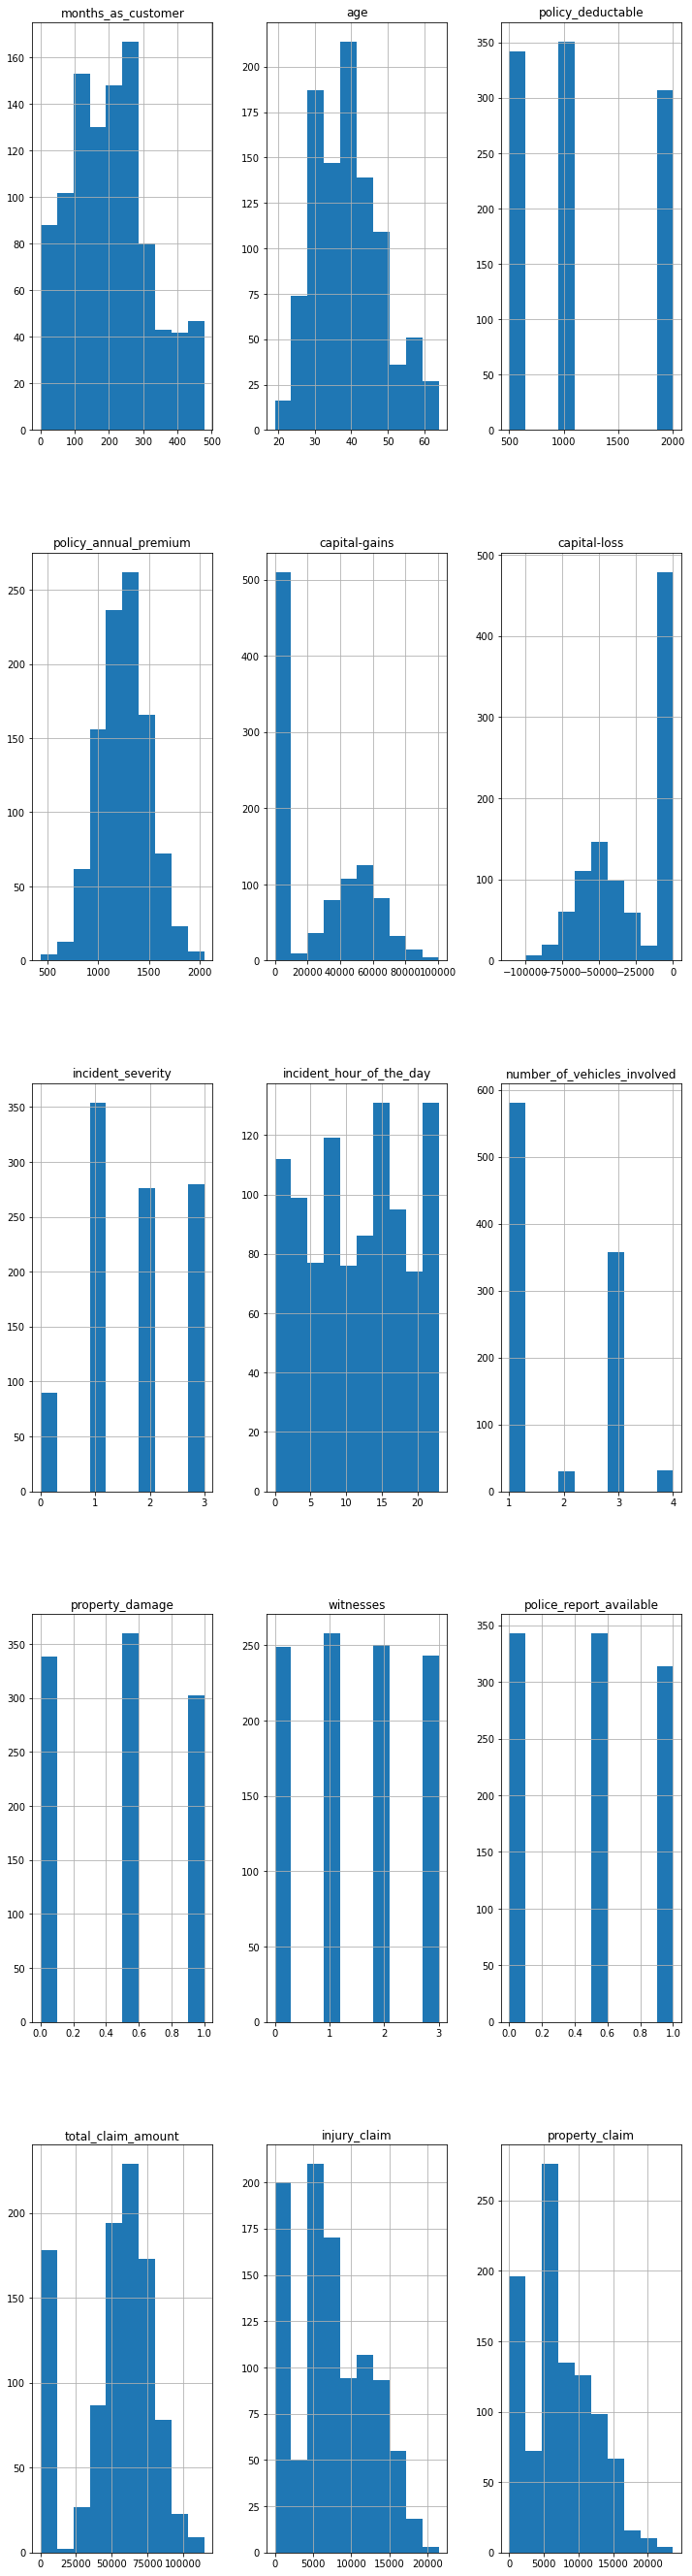

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(data.columns)//3, 3, figsize=(12, 48))
i = 0
for triaxis in axes:
    for axis in triaxis:
        data.hist(column = data.columns[i], bins = 10, ax=axis)
        i = i+1

## Run script

The best parameters are: (25, 2, 2, 750, 'gaussian')
There are 8 clusters
The size of clusters are  [[  0  93]
 [  1 160]
 [  2  66]
 [  3 155]
 [  4 132]
 [  5 129]
 [  6  63]
 [  7 202]]
41.02002930641174
Decision Tree Validation score is 0.67
   months_as_customer       age  policy_deductable  policy_annual_premium  \
0            0.684760  0.644444           0.333333               0.603112   
1            0.475992  0.511111           1.000000               0.473214   
2            0.279749  0.222222           1.000000               0.606972   
3            0.534447  0.488889           1.000000               0.608582   
4            0.475992  0.555556           0.333333               0.712760   

   capital-gains  capital-loss  incident_severity  incident_hour_of_the_day  \
0       0.530348      1.000000           0.666667                  0.217391   
1       0.000000      1.000000           0.333333                  0.347826   
2       0.349254      1.000000           0.333333     

C:\Users\dompa\Documents\Dissertation Code\module\visual.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


AttributeError: 'str' object has no attribute 'update'

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 576x576 with 0 Axes>

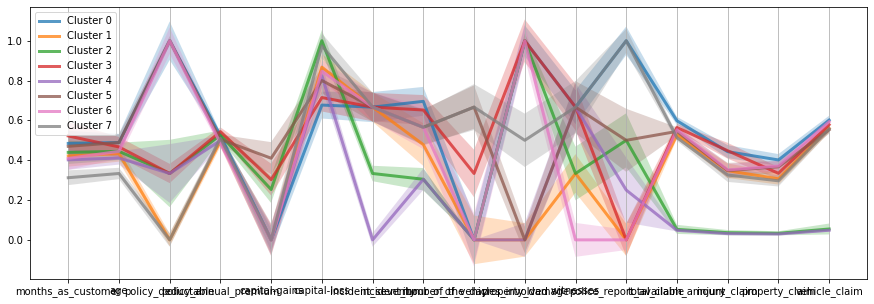

In [6]:
from module.ClusterAnalysis import runClusterAnalysis

params = {'xy': [8,15,20,25],
          'sigma' : [0.5,0.75,1,2,3,4],
          'learning_rate' : [0.5,0.75,1,2,5],
          'iterations' : [750],
          'neighborhood_function' : ['gaussian']}


runClusterAnalysis(data, labelcolumn = 'fraud_reported',labelnames=['Not Fraud', 'Fraud'], saveimagepath = './visSOMMotor', algorithm = 'som', validationthreshold = 0.65, SOMParams = params)